# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview


In [38]:
# Checking the number of mice.
print(f"Number of unique Mouse IDs: {merged_data['Mouse ID'].nunique()}")



Number of unique Mouse IDs: 249


In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
if len(duplicated_mouse) == 0:
    print("There are no duplicate mouse IDs with timepoints.")
else:
    print(f"The mouse ID with duplicate timepoints is {duplicated_mouse[0]}")
    print(merged_data[merged_data['Mouse ID'] == duplicated_mouse[0]])



The mouse ID with duplicate timepoints is g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'] != duplicated_mouse[0]]


In [42]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique Mouse IDs after cleaning: {cleaned_data['Mouse ID'].nunique()}")

Number of unique Mouse IDs after cleaning: 248


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_group = cleaned_data.groupby("Drug Regimen")


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = drug_regimen_group.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
print(summary_statistics)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

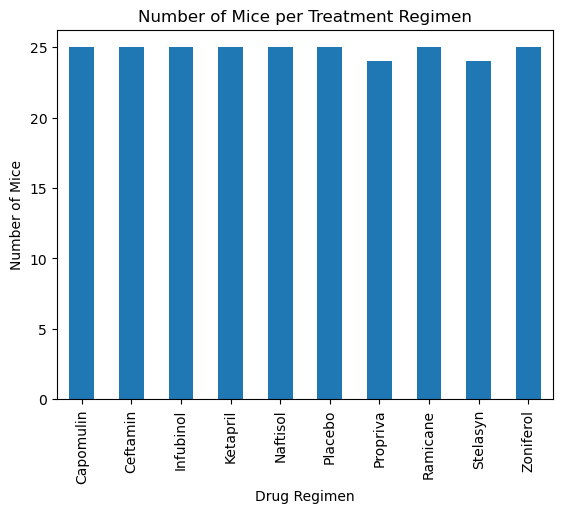

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = cleaned_data.groupby("Drug Regimen")["Mouse ID"].nunique()
# Create a bar chart using plot.bar() function to show the number of mice for each drug regimen
mice_count.plot(kind='bar', title='Number of Mice per Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group data by drug regimen and count number of unique mouse IDs
regimen_counts = merged_data.groupby('Drug Regimen')['Mouse ID'].nunique()

# Create bar plot
plt.bar(regimen_counts.index, regimen_counts.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')
plt.title('Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


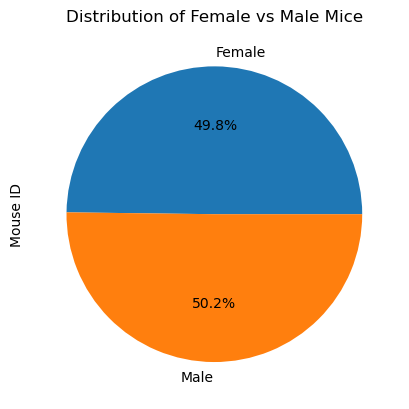

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt

# Group data by sex and count number of unique mouse IDs
sex_counts = merged_data.groupby('Sex')['Mouse ID'].nunique()

# Create pie plot
sex_counts.plot.pie(autopct='%1.1f%%')

# Add title
plt.title('Distribution of Female vs Male Mice')

plt.show()




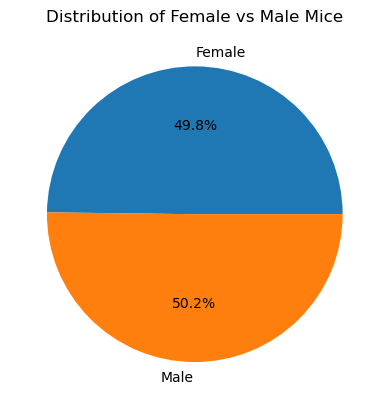

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



# Group data by sex and count number of unique mouse IDs
sex_counts = merged_data.groupby('Sex')['Mouse ID'].nunique()

# Create pie plot
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Female vs Male Mice')

plt.show()





## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Create a list of the four treatment regimens of interest
# # Get the last (greatest) timepoint for each mouse
# Get the last (greatest) timepoint for each mouse
# Create a list of the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the merged DataFrame to include only the four treatments
filtered_df = merged_data[merged_data['Drug Regimen'].isin(treatments)]

# Group data by Mouse ID and find the maximum timepoint for each mouse
max_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge the max timepoints back with the original merged DataFrame
merged_max_df = pd.merge(max_timepoints, merged_data, on=['Mouse ID', 'Timepoint'], how='left')

# Select only the columns we need (Mouse ID, Drug Regimen, and Tumor Volume)
final_tumor_volumes = merged_max_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]





In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Loop through treatments and calculate IQR and potential outliers
for treatment in treatments:
    # Subset data for current treatment and final timepoint
    subset = merged_data.loc[(merged_data['Drug Regimen'] == treatment) & (merged_data['Timepoint'] == 45)]
    
    # Append tumor volumes to list
    tumor_volumes.append(subset['Tumor Volume (mm3)'])
    
    # Calculate quartiles and IQR
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = subset.loc[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print results
    print(f"{treatment}:")
    print(f"IQR: {iqr}")
    if len(outliers) == 0:
        print("No potential outliers.")
    else:
        print(f"Potential outliers: {outliers['Tumor Volume (mm3)'].tolist()}")
    print()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Loop through treatments and append tumor volume data to tumor_vols list
for treatment in treatments:
    tumor_vol_data = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Final Tumor Volume (mm3)"]
    tumor_vols.append(tumor_vol_data)

# Set up box plot parameters
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Generate box plot
ax.boxplot(tumor_vols, labels=treatments)

# Show plot
plt.show()






## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Filter the original dataframe to only include data for mice treated with Capomulin
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Step 2: Select a single mouse from the filtered data (e.g., mouse id 's185')
mouse_id = "s185"
single_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

# Step 3: Create a new dataframe with only the Timepoint and Tumor Volume (mm3) columns for the selected mouse
plot_df = single_mouse_df[["Timepoint", "Tumor Volume (mm3)"]]

# Step 4: Use Matplotlib's plot() function to create a line plot of the tumor volume vs. time point
import matplotlib.pyplot as plt

plt.plot(plot_df["Timepoint"], plot_df["Tumor Volume (mm3)"])

# Add axis labels and title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time for Mouse {mouse_id} (Capomulin)")
plt.show()


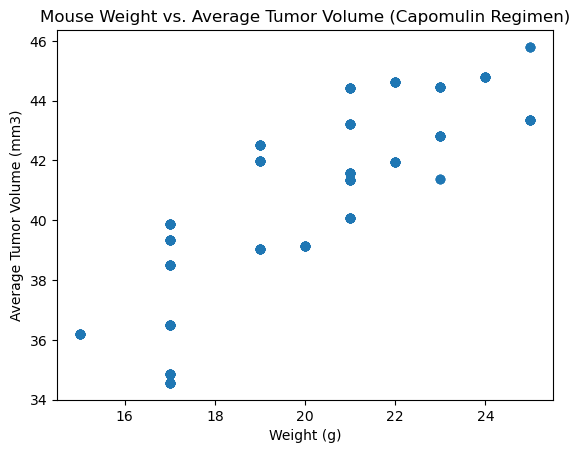

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Get the data for the Capomulin regimen
# Get the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

# Merge the mouse weight data with the average tumor volume data
capomulin_df = pd.merge(avg_tumor_vol, cleaned_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Generate a scatter plot
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


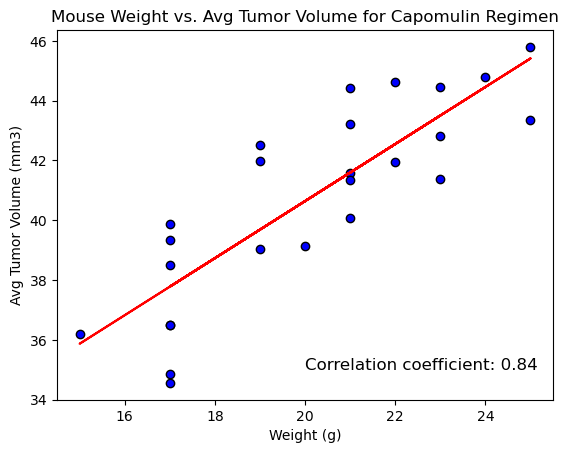

In [46]:
# Calculate the average tumor volume for each mouse on the Capomulin regimen
capomulin_avg_tumor_vol = pd.DataFrame(cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).reset_index().rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})

# Merge the average tumor volume data with the mouse metadata to get the weight of each mouse
capomulin_avg_tumor_vol = pd.merge(capomulin_avg_tumor_vol, mouse_metadata, on="Mouse ID")

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Avg Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black")

# Set the title and axis labels
plt.title("Mouse Weight vs. Avg Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

# Calculate the correlation coefficient and add it to the plot as text
corr_coef = round(st.pearsonr(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Avg Tumor Volume (mm3)"])[0], 2)
plt.text(20, 35, f"Correlation coefficient: {corr_coef}", fontsize=12)

# Calculate the linear regression model and plot it on the scatter plot
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Avg Tumor Volume (mm3)"])
regress_values = slope * capomulin_avg_tumor_vol["Weight (g)"] + intercept
plt.plot(capomulin_avg_tumor_vol["Weight (g)"], regress_values, color="red")

# Show the plot
plt.show()


